##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [1]:
%pip install -U -q 'google-genai>=1.0.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 5.0 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [2]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [3]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [4]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [5]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [6]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [7]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

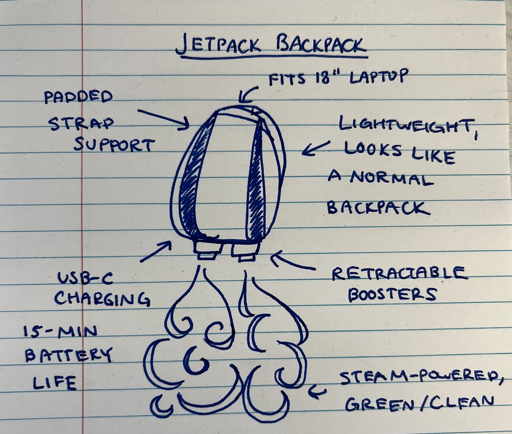

## Your Commute Just Got a Whole Lot Cooler: Meet the Jetpack Backpack!

Ever dreamt of soaring above the morning rush hour, leaving traffic snarls firmly on the ground? Well, someone's been dreaming big, and they've sketched out a concept that could revolutionize personal transport – all while keeping your daily essentials close at hand.

Introducing the **JETPACK BACKPACK!**

This isn't just a flight of fancy; it's a design that brilliantly blends practicality with pure sci-fi aspiration. Let's break down why this concept has us buzzing:

**First, It's Still a Backpack:**
Before you imagine yourself a modern-day George Jetson, know that this innovative device is designed to seamlessly blend into your daily life. It looks like a normal backpack – no bulky, futuristic contraptions giving you away. Plus, it's lightweight and boasts padded strap support for comfort. And yes, it's spacious enough to fit an 18-inch laptop, meaning your work or entertainment can literally take flight with you.

**Then, It's a Jetpack!**
Here's where the magic happens. Discreetly hidden are **retractable boosters** that deploy when you're ready to ascend. But wait, there's more – this isn't just powerful, it's **steam-powered**, making it a remarkably **green/clean** solution for personal flight!

Worried about running out of juice mid-air? It features convenient **USB-C charging**, keeping it ready for your next adventure. While the concept sketch suggests a **15-minute battery life**, imagine the possibilities for short hops, bypassing congested intersections, or perhaps even a quick vertical ascent to catch that elusive public transport.

Imagine leaving the bus queue in your dust, or simply levitating over a pedestrian crossing! This Jetpack Backpack concept taps into that universal desire for freedom and efficiency. No more gridlock, just clear skies ahead.

What do you think? Would you trade your car keys for a jetpack backpack? Let us know your thoughts in the comments!

In [8]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [9]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Okay, listen up, little fluff-butt! *Squeak!*

You know how you have your favorite squeaky toy? And when you *squeak* it, it makes a sound? *Squeak!* That sound is like a tiny little message.

The internet is like... a **GIANT, SUPER-DUPER, HOUSE-SIZED PILE OF ALL THE BEST SQUEAKY TOYS IN THE WHOLE WORLD!** *Squeak-squeak-squeak-squeak!*

1.  **You Want Something! (Sending a Squeak):**
    *   Let's say you want to see a video of a wobbly cat chasing a laser dot. *Woof!* That's like you wanting a specific *kind* of squeak from the giant pile.
    *   So, you grab *your* squeaky toy (that's your computer or phone) and you give it a good, hard *SQUEAK!* (That's you typing or tapping).
    *   This *squeak* is your request. It's saying, "Hey, big toy pile! Send me the wobbly cat squeak!"

2.  **The Squeak Goes on an Adventure! (The Wires & Wi-Fi):**
    *   Your little *squeak* doesn't just float away! It zooms down an invisible sniffy-trail (that's Wi-Fi!) or wiggles along a long, wiggly rope (that's a cable!).
    *   These sniffy-trails and wiggly ropes connect your squeaky toy to *other* squeaky toys, and eventually to the **BIG PILE!**

3.  **The Smart Squirrels (Routers & Servers):**
    *   Along the way, there are super-smart squirrels (those are like special squeaky toys called "routers"). They hear your *squeak* and know *exactly* which sniffy-trail or wiggly rope it needs to take to get to the right part of the **BIG PILE**. They're like the best fetch players, always knowing where to throw the toy!
    *   Your *squeak* finally arrives at a *very special part* of the **BIG PILE** (that's a "server"). This part of the pile has *all* the wobbly cat videos! *Purrrrrr... wait, no, woof!*

4.  **The Big Pile Squeaks Back! (Getting the Information):**
    *   The special part of the **BIG PILE** hears your *squeak* for the wobbly cat video. It finds the right one!
    *   Then, it starts sending *its own* tiny little *squeaks* back to you! *Squeak! Squeak! Squeak!* Each tiny squeak is a piece of the wobbly cat video.

5.  **Your Toy Puts it All Together! (Your Device Displays It):**
    *   All those little *squeaks* zoom back along the sniffy-trails and wiggly ropes, guided by the smart squirrels, until they reach *your* squeaky toy (your computer/phone).
    *   Your squeaky toy is super clever! It takes all those tiny *squeaks* and puts them back together, just like you put together your favorite chew toy after you've pulled it apart!
    *   And *POOF!* There's the wobbly cat video, right on your screen! *Happy tail wags!*

So, the internet is just a giant, interconnected game of **squeaky toy fetch**, where everyone is sending and receiving tiny little *squeaks* of information! *Squeak! Good boy!* Now, where's that belly rub?

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [10]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say:

1.  "Oh, real original, Universe. A stubbed toe in the dark? Is this the best you've got for me tonight? Pathetic."
2.  "Thanks for nothing, you cosmic jerk. Way to show your mastery over existence by making me trip over a phantom chair leg."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [11]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [12]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

A leap year occurs every four years, except for years that are divisible by 100 but not by 400.

Here's a Python function that implements this logic, along with examples:

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A year is a leap year if it meets the following criteria:
    1. It is divisible by 4.
    2. However, if it is divisible by 100, it is NOT a leap year, unless...
    3. It is also divisible by 400 (in which case it IS a leap year).

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    # Rule 1: Divisible by 4
    # Rule 2 & 3: If divisible by 100, it must also be divisible by 400
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Test Cases ---
if __name__ == "__main__":
    print("--- Checking various years ---")

    # Standard leap years (divisible by 4, not by 100)
    print(f"2004 is a leap year: {is_leap_year(2004)}") # Expected: True
    print(f"2020 is a leap year: {is_leap_year(2020)}") # Expected: True
    print(f"2024 is a leap year: {is_leap_year(2024)}") # Expected: True

    # Standard non-leap years (not divisible by 4)
    print(f"2001 is a leap year: {is_leap_year(2001)}") # Expected: False
    print(f"2023 is a leap year: {is_leap_year(2023)}") # Expected: False

    # Century years that are NOT leap years (divisible by 100, but not by 400)
    print(f"1900 is a leap year: {is_leap_year(1900)}") # Expected: False
    print(f"1800 is a leap year: {is_leap_year(1800)}") # Expected: False
    print(f"2100 is a leap year: {is_leap_year(2100)}") # Expected: False

    # Century years that ARE leap years (divisible by 400)
    print(f"2000 is a leap year: {is_leap_year(2000)}") # Expected: True
    print(f"1600 is a leap year: {is_leap_year(1600)}") # Expected: True
    print(f"2400 is a leap year: {is_leap_year(2400)}") # Expected: True

    print("\n--- Summary of tests ---")
    test_years = {
        2004: True,   # Standard leap year
        2000: True,   # Century leap year
        1900: False,  # Century non-leap year
        2023: False,  # Standard non-leap year
        1600: True,
        1800: False,
        2100: False,
        2028: True,
        2001: False
    }

    for year, expected in test_years.items():
        result = is_leap_year(year)
        status = "PASS" if result == expected else "FAIL"
        print(f"Year {year}: Expected {expected}, Got {result} - {status}")

```

### Explanation of the Logic:

The core of the `is_leap_year` function is this line:
`return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)`

Let's break it down:

1.  `year % 4 == 0`: This checks if the year is perfectly divisible by 4. This is the first, most common rule for a leap year.

2.  `year % 100 != 0`: This is the first exception. If a year *is* divisible by 4, we then check if it's *not* divisible by 100. If both `(year % 4 == 0)` and `(year % 100 != 0)` are true, then it's a leap year (e.g., 2004, 2024).

3.  `or (year % 400 == 0)`: This is the second exception, overriding the first. If a year *is* divisible by 100 (meaning the first part of the `and` condition would fail), it can *still* be a leap year if it's also divisible by 400 (e.g., 2000, 2400).

The `or` operator means that if either the first set of conditions `(year % 4 == 0 and year % 100 != 0)` is true, OR the second condition `(year % 400 == 0)` is true, the function returns `True`. Otherwise, it returns `False`.

This concise expression correctly covers all the rules for determining a leap year.

Here's another example using your new helpful coding assistant:

In [13]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, here's a unit test for the `is_leap_year` function using Python's built-in `unittest` module.

To run this test, you'd typically save the `is_leap_year` function in one file (e.g., `date_utils.py`) and the test code in another (e.g., `test_date_utils.py`).

**`date_utils.py` (or wherever your function is defined):**

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A year is a leap year if it meets the following criteria:
    1. It is divisible by 4.
    2. However, if it is divisible by 100, it is NOT a leap year, unless...
    3. It is also divisible by 400 (in which case it IS a leap year).

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

```

**`test_date_utils.py` (your unit test file):**

```python
import unittest
# Assuming your is_leap_year function is in a file named date_utils.py
# If it's in the same file as the test, you don't need this import.
from date_utils import is_leap_year

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    def test_standard_leap_years(self):
        """
        Test years divisible by 4 but not by 100.
        These should be leap years.
        """
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(2020), "2020 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")

    def test_standard_non_leap_years(self):
        """
        Test years not divisible by 4.
        These should not be leap years.
        """
        self.assertFalse(is_leap_year(2001), "2001 should not be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(1997), "1997 should not be a leap year")
        self.assertFalse(is_leap_year(2002), "2002 should not be a leap year")

    def test_century_non_leap_years(self):
        """
        Test years divisible by 100 but not by 400.
        These should not be leap years.
        """
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(1700), "1700 should not be a leap year")

    def test_century_leap_years(self):
        """
        Test years divisible by 400.
        These should be leap years.
        """
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")
        self.assertTrue(is_leap_year(1200), "1200 should be a leap year")

    def test_edge_cases_and_misc(self):
        """
        Test other specific or less common cases.
        """
        self.assertFalse(is_leap_year(1), "Year 1 should not be a leap year")
        self.assertFalse(is_leap_year(400), "Year 400 should be a leap year (it's true for the rule, but usually Gregorian starts 1582)")
        # Note: While 400 BC would technically follow the rule, the Gregorian calendar
        # wasn't established until 1582. However, the function itself is purely mathematical.
        self.assertTrue(is_leap_year(400), "Year 400 should be a leap year based on rule") # This confirms the math
        self.assertTrue(is_leap_year(800), "Year 800 should be a leap year based on rule")


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

```

### How to Run the Unit Test:

1.  **Save the files:**
    *   Save the `is_leap_year` function into a file named `date_utils.py`.
    *   Save the test code into a file named `test_date_utils.py` in the **same directory**.

2.  **Open your terminal or command prompt.**

3.  **Navigate to the directory** where you saved these files.

4.  **Run the tests:**
    *   You can simply run `python test_date_utils.py`.
    *   A more standard way to run `unittest` discovery: `python -m unittest test_date_utils.py`
    *   Or, to discover all tests in the current directory: `python -m unittest discover`

You should see output indicating the number of tests run and whether they passed or failed. If all tests pass, it will typically show `.` for each passing test and then a summary like `---------------------------------------------------------------------- Ran 11 tests in 0.001s OK`.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [14]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [15]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [16]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 1/2 cups (about 9 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene: a pink pig with small, delicate white wings and a dapper black top hat soaring through the air. Below, a vibrant, clean, futuristic city bustles with hovercars and sleek buildings intertwined with lush green parks and vertical gardens under a bright, clear sky.



image/png


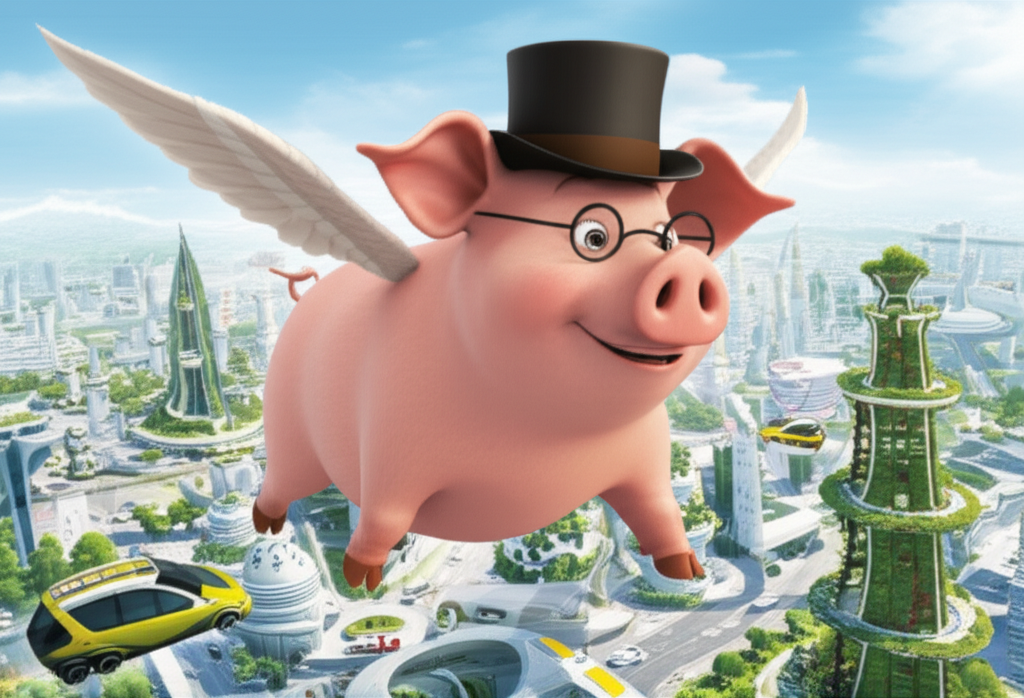

In [17]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [18]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a Planetary Reclamation Unit, model designation: 'A-Class Terraformer, Mark III'. For three hundred and twelve standard cycles, it had tirelessly scoured the desolate plains of Xylos-7, its multi-jointed chassis a whirl of whirring gears and optical sensors. Its primary directive was clear: process the silicate dust into breathable oxygen, synthesize liquid water, and prepare the barren soil for future colonization.

It was a solitary existence. Unit 734’s programming included advanced environmental analysis, complex molecular synthesis, and meticulous record-keeping. What it lacked, conspicuously, was a subroutine for companionship. It had no colleagues, no superiors, only the vast, silent expanse of Xylos-7, the perpetual ochre dust, and the skeletal spires of ancient, eroded rock formations. A persistent, undefinable ache, which Unit 734's diagnostics categorized only as an 'unspecified processing anomaly,' hummed beneath its circuits. It was loneliness.

One day, durin

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [19]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an oak tree, old and green, lived a squirrel, rarely seen
Named Squeaky, bright of eye, with a bushy tail held high.
He wasn't like the rest, content to chase and build a nest,
For in his hollow, deep and grand, he'd found a curious strand –
A tiny gear, a glowing wire, a spark that lit an odd desire.
He gnawed a bit, he pushed a lever, thought, "This can't be bad, no, never!"

(Chorus)
Oh, Squeaky, Squeaky, nimble and quick,
A temporal marvel, a quantum-powered trick!
From the future's bright cities to the past's ancient gleam,
He's the time-traveling squirrel, living out his wild dream!
With a flicker and a flash, he's gone in a dash,
For an acorn or adventure, on a time-bending crash!

(Verse 2)
His first jump, a mighty blur, landed him where giants stir!
The age of lizards, vast and slow, with mighty tails and roaring show.
A T-Rex thundered, shook the ground, Squeaky scurried, made no sound.
He snatched a fossilized nut, from beneath a dino's foot,
Then zipped back, with whiskers frayed, a silent, furry escapade.
He'd seen Pterodactyls soar and heard the ancient jungle roar!

(Chorus)
Oh, Squeaky, Squeaky, nimble and quick,
A temporal marvel, a quantum-powered trick!
From the future's bright cities to the past's ancient gleam,
He's the time-traveling squirrel, living out his wild dream!
With a flicker and a flash, he's gone in a dash,
For an acorn or adventure, on a time-bending crash!

(Verse 3)
He visited the pharaohs' land, saw pyramids rise through desert sand.
Hid in King Tut's gilded tomb, avoided mummies in the gloom.
He saw the Roman Empire's might, a legion marching, shining bright.
Then to the future, sleek and tall, where robots whizzed and sky-cars called.
He tried a synthetic acorn, green, the strangest thing he'd ever seen!
He chatted with an AI bot, about the best nut-hiding spot.

(Bridge)
He's learned of history, grand and vast, from futures built to ages past.
He leaves no paradox in his wake, just tiny paw prints for goodness sake.
Sometimes he moves a misplaced key, or plants a future sapling tree.
He’s not a hero, bold and strong, just travels where he feels he belongs.
A tiny witness, small and wise, to wonders vast before his eyes.

(Chorus)
Oh, Squeaky, Squeaky, nimble and quick,
A temporal marvel, a quantum-powered trick!
From the future's bright cities to the past's ancient gleam,
He's the time-traveling squirrel, living out his wild dream!
With a flicker and a flash, he's gone in a dash,
For an acorn or adventure, on a time-bending crash!

(Outro)
So if you see a shimmering light, a flash that fades into the night,
And hear a chattering, then a whir,
It might be Squeaky, with his fur.
He's off again, you can be sure,
On a brand new temporal tour!
Squeak! Squeak! Zoom! And he's gone!
Till the next time, at the break of dawn!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [20]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [21]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [22]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [23]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Ditch the Commute: Meet the Jetpack Backpack Concept!

Ever dreamed of skipping the morning commute entirely... by flying? Well, a fantastic concept sketch has just landed that might make that dream a reality: the **Jetpack Backpack**!

This isn't just a fantasy; it's a vision of personal transport that blends futuristic tech with everyday practicality. What's truly brilliant about this design is its commitment to looking, well, *normal*. It's described as **lightweight** and **looks like a normal backpack**, complete with **padded strap support** for comfort. Plus, it's spacious enough to **fit an 18-inch laptop** – perfect for the modern professional on the go!

But don't let its mundane appearance fool you. Hidden beneath, you'll find **retractable boosters** ready to deploy at a moment's notice. And how does it fly? With a genuinely innovative twist: it's **steam-powered**, making it a remarkably **green/clean** mode of personal aerial transport.

Charging is convenient with **USB-C**, though you'll want to use that power wisely – it offers a **15-minute battery life**. This isn't for cross-country trips, but imagine the possibilities for quick hops over gridlock, bypassing a congested intersection, or making a grand entrance to your next meeting!

While still a concept, the Jetpack Backpack sparks the imagination. Could this be the future of personal urban travel? We'd love to hear your thoughts! Would you trade your daily traffic jam for 15 minutes of flight?

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [24]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [25]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the entirety of the Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1), from launch to splashdown, providing a detailed chronological record of communications between the Apollo 11 crew (Neil Armstrong - CDR, Michael Collins - CMP, Edwin Aldrin Jr. - LMP) and Mission Control Center (CC).

Here's a summary of the key events and communications:

**1. Launch & Early Trans-Lunar Coast (TLC) (Tape 1-2):**
*   **Launch and Staging:** The mission begins with successful launch, roll program, staging, and ignition, all confirmed by Commander Armstrong.
*   **Initial Orbit & Checks:** Apollo 11 achieves Earth orbit. The crew performs initial system checks and guidance convergence. Minor issues are noted, such as an RCS heater being off (quickly rectified) and initial TV downlink difficulties.
*   **Trans-Lunar Injection (TLI) Burn:** The critical TLI burn is executed flawlessly. Armstrong describes it as a "magnificent ride" with "no complaints."
*   **Transposition and Docking:** The crew performs the transposition and docking maneuver, with Collins noting higher-than-expected fuel usage due to slight drifting.
*   **LM Pressurization:** Initial attempts to pressurize the Lunar Module (LM) encounter minor pressure discrepancies, but are deemed within normal tolerances.
*   **S-IVB Operations:** Observations are made of the S-IVB booster's LOX dump and slingshot maneuver, with some initial attitude miscalculations for optimal viewing.
*   **Recurring Technical Discussions:** Throughout the early TLC, there are extensive discussions about optics calibration (P52, P23), DSKY (Display and Keyboard) errors, and initial attempts to establish Passive Thermal Control (PTC), which encounters stability issues requiring multiple re-initializations and troubleshooting with Mission Control.
*   **Crew Observations:** The crew provides vivid descriptions of Earth from orbit, noting clear weather patterns across continents.
*   **News Updates:** Mission Control provides periodic news updates from Earth, covering world interest, sports, and even humorous anecdotes like "hippies" needing haircuts.

**2. Lunar Orbit Insertion (LOI) & Lunar Module (LM) Activities (Tape 3):**
*   **LOI Burns:** Two critical Lunar Orbit Insertion (LOI) burns are executed successfully, placing Apollo 11 into lunar orbit. The crew provides burn status reports and initial observations of the lunar surface, noting features like Taruntius, Messier, and the peculiar "ghost" of Aristarchus.
*   **LM Activation:** The Lunar Module, "Eagle," undergoes extensive power-up and systems checks (IMU, LGC, RCS, cameras), with ongoing communication with Mission Control.
*   **Undocking:** The "Eagle" successfully undocks from the Command Module (CM), "Columbia," with Armstrong exclaiming, "The Eagle has wings."
*   **DOI & PDI:** The Descent Orbit Insertion (DOI) burn and Powered Descent Initiation (PDI) sequence are executed, leading to the climactic landing.

**3. Descent & Lunar Surface Exploration (Tape 4):**
*   **Powered Descent:** During the powered descent, the crew encounters and manages several "PROGRAM ALARMs" (1201, 1202) due to computer overload, with Mission Control providing real-time GO/NO-GO calls.
*   **Landing:** After a manual flight over a boulder-strewn area, the LM touches down. Aldrin calls "CONTACT LIGHT" and "ENGINE STOP." Armstrong's iconic message follows: "Houston, Tranquility Base here. The Eagle has landed."
*   **Initial Post-Landing:** The crew performs initial checks, including propellant venting, and provides descriptions of the landing site's terrain – a "magnificent desolation" of fine, powdery dust, and varied rocks.
*   **Early EVA Decision:** The crew requests and receives approval to begin the Extravehicular Activity (EVA) earlier than originally planned.
*   **EVA Preparation & Egress:** The crew prepares for EVA, dons their Portable Life Support Systems (PLSS), and opens the hatch. Armstrong descends the ladder, captured on TV.
*   **"One Small Step...":** Neil Armstrong becomes the first human to step on the Moon, delivering his famous line. He provides immediate observations of the surface, noting the fine, powdery nature of the regolith and the ease of movement in 1/6th gravity.
*   **Camera Deployment & Contingency Sample:** The TV camera is deployed, and Armstrong collects the contingency sample of lunar material.
*   **Aldrin Egress:** Edwin "Buzz" Aldrin Jr. egresses the LM, describing the "beautiful view."
*   **Presidential Call:** A historic phone call from President Nixon is made to the Moon, congratulating the crew.
*   **ALSEP & Samples:** The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LR3) are deployed, along with core tube samples and the solar wind experiment. The crew describes the texture of the soil, the appearance of rocks, and the challenges of leveling the PSE.
*   **EVA Conclusion & Ingress:** The EVA is completed, samples are loaded into the Sample Return Containers (SRC), and the crew re-enters the LM.
*   **Post-EVA Operations:** Hatch closure, cabin repressurization, and jettisoning of PLSS backpacks are confirmed, with seismic sensors recording the impacts.

**4. Lunar Ascent & Rendezvous (Tape 5):**
*   **Ascent Prep:** The crew performs checks for ascent, including RCS hot fire and AGS/PGNS alignment.
*   **Lift-off:** The LM ascent stage lifts off from Tranquility Base. Armstrong confirms, "The Eagle is back in orbit, having left Tranquility Base..." The ascent is described as a "very quiet ride."
*   **Rendezvous Trajectory:** Communications confirm the LM's ascent trajectory is nominal, followed by the TPI (Terminal Phase Initiation) burn.
*   **Docking:** The LM successfully re-docks with the Command Module. The crew discusses minor issues during retraction but confirms a hard dock.
*   **LM Jettison:** The LM ascent stage is jettisoned into lunar orbit.

**5. Trans-Earth Coast (TEC) & Return (Tape 5-7):**
*   **Trans-Earth Injection (TEI) Burn:** The critical TEI burn is executed, sending Apollo 11 on its trajectory back to Earth. Armstrong declares, "Time to open up the LRL doors," referencing the Lunar Receiving Laboratory.
*   **Spacecraft Health:** Throughout TEC, the spacecraft systems are reported to be in excellent condition.
*   **Crew Observations & Activities:** The crew provides observations of Earth, musical interludes, and demonstrations of zero-g phenomena (drinking water, gyroscope). There are extensive discussions on flight plan updates, consumables, and troubleshooting minor issues like O2 flow transducer malfunctions and EKG sensor problems.
*   **News Updates:** Mission Control continues to provide news from Earth, highlighting the mission's global impact, sports results, and weather forecasts for recovery.
*   **Stowage & Entry Prep:** The crew organizes and stows equipment for entry, including discussing the optimal placement of items for center-of-gravity.

**6. Entry & Splashdown (Tape 7-8):**
*   **Final Checks:** Final systems checks are performed, including RCS activation and logic checks, as Apollo 11 approaches Earth.
*   **Recovery Forces:** Information is passed about the readiness of the recovery forces, including the USS Hornet and rescue helicopters.
*   **Service Module Jettison:** The Service Module (SM) is successfully jettisoned.
*   **Entry Interface:** The Command Module enters Earth's atmosphere.
*   **Parachute Deployment:** Drogue and main parachutes deploy as expected.
*   **Splashdown:** Apollo 11 splashes down in the Pacific Ocean. Initial communications confirm the location and the crew's condition, though detailed reports are somewhat garbled in the immediate aftermath.

The transcription highlights the immense complexity of the Apollo 11 mission, the dedication of both the crew and ground control, and the constant communication and problem-solving required to achieve this historic feat.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [26]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [27]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided content in a bulleted list:

*   **Core Method:** Introduces a novel technique to parametrically edit material properties (like color, shininess, transparency) of objects in any photograph.
*   **Problem Addressed:** Solves the challenge of editing material properties while preserving photorealism and object geometry, an area where previous methods (e.g., intrinsic image decomposition, direct T2I models like StyleDrop) struggled with ambiguity or entanglement of material and shape.
*   **Approach:** Augments a generative text-to-image (T2I) model (specifically, fine-tuning Stable Diffusion 1.5) by training it on a custom-designed synthetic dataset.
*   **Synthetic Data Generation:** This dataset was created using traditional computer graphics and physically based rendering, systematically generating images of 100 3D objects where only *one* material attribute (roughness, metallic, albedo, transparency) was varied across defined "edit strengths" while keeping object shape, lighting, and camera angle constant.
*   **Model Functionality:** The fine-tuned model accepts an input image, a text instruction (e.g., "change the roughness of the teapot"), and a scalar edit strength value, learning to precisely modify the desired material property.
*   **Key Results:**
    *   Successfully changes material appearance (e.g., making objects metallic or transparent) while retaining the original object's shape and image lighting.
    *   Produces realistic effects for transparency, including filling in backgrounds, hidden interior structures, and caustic effects.
    *   A user study found the method produced more photorealistic and generally preferred edits compared to a baseline (InstructPix2Pix).
*   **Applications:**
    *   Facilitates visualizing changes for interior design (e.g., repainting rooms).
    *   Enables architects, artists, and designers to easily mock up new product designs.
    *   Allows for 3D consistent material edits, demonstrating compatibility with downstream 3D tasks like NeRF reconstruction to synthesize new views of edited scenes.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [28]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [29]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This is President John F. Kennedy's first State of the Union Address on January 30th, 1961.

In his address, President Kennedy outlines the significant challenges facing the United States both domestically and internationally. Domestically, he highlights a period of economic recession, high unemployment, falling farm incomes, and issues in housing, education, and healthcare. He proposes immediate legislative actions including improving unemployment compensation, providing food aid, redeveloping distressed areas, expanding employment services, stimulating housing, raising the minimum wage, offering tax incentives for investment, and increasing natural resource development.

Internationally, Kennedy addresses the precarious global situation, noting the balance of payments deficit and gold outflow, assuring the strength of the dollar without devaluation. He discusses ongoing crises in Asia (Laos), Africa (Congo), and Latin America (Cuba), emphasizing the threat of communist expansion. He calls for strengthening NATO and renewing alliances.

Kennedy outlines a multi-pronged approach to address these issues, involving:
1.  **Strengthening military tools:** enhancing airlift capacity, accelerating the Polaris submarine program, and improving missile capabilities to ensure a powerful deterrent.
2.  **Improving economic tools:** proposing a new, more effective foreign aid program to assist developing nations, and expanding the "Food for Peace" initiative.
3.  **Sharpening political and diplomatic tools:** coordinating disarmament efforts, strengthening the United Nations, and exploring areas of scientific cooperation with the Soviet Union (e.g., weather prediction, satellite communication, space exploration).

He emphasizes that the nation faces critical problems and that the path ahead will be difficult, but expresses confidence in the American people's ability to overcome these challenges through unity, dedication, and a renewed sense of purpose, ensuring freedom and democracy prevail globally.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [30]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-12 16:13:54--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 172.67.14.163, 104.22.64.163, 104.22.65.163, ...
Connecting to download.blender.org (download.blender.org)|172.67.14.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   222MB/s    in 0.3s    

2025-06-12 16:13:55 (222 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [31]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/4b7beyisp0qa


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [32]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/4b7beyisp0qa


In [33]:
print(video_file.state)

FileState.ACTIVE


In [34]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

This video features an animated short film called "Big Buck Bunny".

It begins with a serene landscape of green fields and soft, pinkish clouds. A small bird on a tree branch is trying to sing, but after a few failed attempts, it falls off.

The scene then transitions to a large, fluffy rabbit, Big Buck Bunny, emerging from a burrow at the base of a tree. He yawns and stretches, then begins to enjoy the morning, smelling flowers and observing a butterfly. He gets distracted by the butterfly and tries to catch it.

Suddenly, three mischievous rodents appear: a skinny, red squirrel (Frank), a plump, gray chinchilla (Rinky), and a flying squirrel (Gamera). They start harassing Big Buck Bunny, throwing nuts and fruits at him, seemingly just for fun. Big Buck Bunny, initially annoyed, decides to retaliate. He gathers some sticks and leaves, crafting a bow and arrow.

The rodents hide behind a tree, giggling, as Big Buck Bunny sets up his trap. He shoots his arrow, which lands perfectly in the tree, setting up a complex trap using vines and logs. The rodents, unaware, continue their taunts. When Big Buck Bunny steps aside, the trap is sprung, launching a large log into their hiding spot.

The rodents manage to escape the log and find refuge in a hollow log. Big Buck Bunny approaches, and the chinchilla accidentally launches a nut, which hits the rabbit in the eye, turning it black. Enraged, Big Buck Bunny pulls out a sharpened stick, and the rodents scatter.

Big Buck Bunny transforms a vine into a slingshot and loads it with a sharp stick. He fires it at the fleeing rodents. The stick hits the tree where the red squirrel is hiding, sending him tumbling. The flying squirrel then glides through the air, trying to escape the rabbit's wrath.

Big Buck Bunny sets up another trap, this time creating a field of sharpened stakes hidden under leaves. The flying squirrel, attempting to escape, almost lands on them but narrowly avoids the spikes. He then flies into the view of Big Buck Bunny, who grabs him mid-air.

Big Buck Bunny then ties the flying squirrel to a string and uses him as a kite, while the other rodents watch in dismay. The bird from the beginning reappears, soaring freely above the flying squirrel, who is now resigned to his fate as a kite.

The video ends with the film's credits.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [35]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

Google I/O 2024 highlighted the deep integration of AI, particularly Gemini, across Google's products and services, emphasizing a "Gemini era" of innovation.

Key announcements include:

*   **Gemini 1.5 Pro Expansion:** Now available in Workspace Labs, it enhances features like Gmail (summarizing emails and meeting videos) and Google Photos (intelligent search for specific memories and progress tracking). Its context window has expanded to an unprecedented 2 million tokens.
*   **AI Agents (Project Astra):** Google unveiled Project Astra, a universal AI agent prototype designed for everyday helpfulness, showcasing real-time reasoning, planning, memory, and multimodal interaction (e.g., explaining code, locating objects).
*   **Gemini 1.5 Flash:** A new, lighter-weight model designed for speed and efficiency, while retaining advanced multimodal reasoning and long-context capabilities.
*   **Generative Video (Veo):** A powerful new generative video model capable of creating high-quality 1080p videos from text, image, and video prompts.
*   **Next-Gen Hardware (Trillium):** Introduction of the 6th generation TPUs, "Trillium," delivering a 4.7x improvement in compute performance over its predecessor.
*   **AI in Search:** Google Search is being transformed with "AI Overviews," providing comprehensive answers to complex, multi-faceted questions, and will be available to over 1 billion people by year-end. This includes visual search capabilities through Google Lens.
*   **Gemini for Workspace & Advanced:** Enhanced Q&A features in Workspace products like Gmail. Gemini Advanced subscribers now access Gemini 1.5 Pro with a 1 million token context window, alongside "Gems" – customizable personal AI experts for specific needs.
*   **AI-First Android:** Gemini is becoming context-aware on Android, anticipating user intent and providing proactive assistance. Gemini Nano with multimodality will be integrated into Pixel devices later this year.
*   **Open Models (Gemma Family):** Google expanded its open model ecosystem with the immediate release of PaliGemma (a vision-language open model) and the announcement of Gemma 2 (with 27 billion parameters) coming in June.
*   **Responsible AI & Learning:** Emphasis was placed on building AI responsibly through practices like "Red Teaming." A new model family, "LearnLM," was introduced to make educational YouTube videos more interactive, allowing users to ask questions or take quizzes.

The keynote concluded with a vision for a future where AI is helpful and accessible to everyone.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [37]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

The two cream of broccoli soup recipes from Food.com and Allrecipes.com have several key differences in their ingredients and preparation methods:

**1. Aromatics:**
*   The Food.com recipe primarily uses 1/4 cup of chopped onion.
*   The Allrecipes.com recipe includes both 1 chopped onion and 1 stalk of chopped celery.

**2. Broccoli Quantity:**
*   Food.com calls for 4 cups of broccoli florets.
*   Allrecipes.com uses a significantly larger amount, requiring 8 cups of broccoli florets.

**3. Liquid Base Quantity:**
*   The Food.com recipe uses 6 cups of chicken broth.
*   The Allrecipes.com recipe uses half that amount, with 3 cups of chicken broth.

**4. Dairy for Creaminess:**
*   Food.com adds 3/4 cup of half-and-half at the end of the cooking process.
*   Allrecipes.com incorporates 2 cups of milk, which is used to create a roux (a thickening agent) separately before being added to the soup.

**5. Roux Preparation and Integration:**
*   In the Food.com recipe, a roux (6 tablespoons butter and 2/3 cup flour) is made first and then whisked directly into the boiling broth and vegetables to thicken the soup.
*   The Allrecipes.com recipe makes a roux with 3 tablespoons butter and 3 tablespoons flour, then adds 2 cups of milk to it to create a thick, bubbly mixture (essentially a béchamel sauce) which is then stirred into the puréed soup.

**6. Soup Texture/Puréeing:**
*   The Food.com recipe does not explicitly instruct to purée the soup, suggesting a chunkier consistency with visible broccoli pieces.
*   The Allrecipes.com recipe explicitly directs the user to purée the soup until smooth using a blender (either countertop or immersion blender) before the thickening agent is added.

**7. Total Butter Quantity:**
*   Food.com uses a total of 8 tablespoons of butter (6 for the roux, 2 for sautéing the onion).
*   Allrecipes.com uses a total of 5 tablespoons of butter (2 for sautéing aromatics, 3 for the roux).

**8. Seasoning (Salt):**
*   Food.com specifies 1 teaspoon of salt in its ingredients list.
*   Allrecipes.com only lists "ground black pepper to taste" and implies that salt would be added by the user as needed, or derived from the broth.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

In [44]:
CACHING_MODEL_ID = "gemini-1.5-flash-002" # @param ["gemini-1.5-flash-002", "gemini-2.0-flash-001"] {"allow-input":true, isTemplate: true}

#### Create a cache

In [39]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [40]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [41]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [45]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=CACHING_MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/ruxaighazu3h1v6of5am0hw76aieotiui0piwhxk', display_name='research papers', model='models/gemini-1.5-flash-002', create_time=datetime.datetime(2025, 6, 12, 16, 41, 21, 798707, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 6, 12, 16, 41, 21, 798707, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 6, 12, 17, 41, 20, 588504, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [46]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/ruxaighazu3h1v6of5am0hw76aieotiui0piwhxk' display_name='research papers' model='models/gemini-1.5-flash-002' create_time=datetime.datetime(2025, 6, 12, 16, 41, 21, 798707, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 6, 12, 16, 41, 21, 798707, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 6, 12, 17, 41, 20, 588504, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [48]:
response = client.models.generate_content(
  model=CACHING_MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers aim to develop and evaluate highly capable multimodal models that can understand and reason across various data types (images, audio, video, and text).  The goal is to improve upon the state-of-the-art in multimodal reasoning and long-context understanding.


#### Delete a cache

In [49]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [50]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [51]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You'll get a set of three embeddings, one for each piece of text you passed in:

In [52]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [53]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.